In [2]:
import seaborn as sns

df = sns.load_dataset("tips")
print(df.head())



   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [ ]:
#2.dataframe info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
#3.statistical summary
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


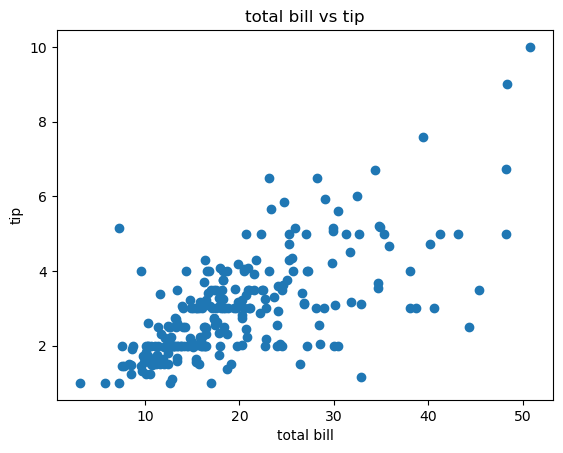

In [ ]:
#4.relationship check
#before using any model,we must confirm relationship..?
import matplotlib.pyplot as plt
plt.scatter(df['total_bill'],df['tip'])
plt.xlabel('total bill')
plt.ylabel('tip')
plt.title('total bill vs tip')
plt.show()




In [ ]:
#by observing graph
#1.as bill increase tip increase
#2.relationship=straight line

In [ ]:
#5.feature and target separation
#input must be in 2D
X=df[['total_bill']]#feature ip in 2D only(imp)
y=df['tip']#feature op 1D(target)

In [ ]:
#6.Train-test split
#why-a model must perform on unseen data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,
                                                 test_size=0.2,
                                                 random_state=42
                                                 )
#80%-->training
#20%-->testing

In [ ]:
#7.feature standardization
#why-to bring all features to same scale
#1.Compare the Co-efficients fairly
#2.Avoid the dominance of Large values
#3.prepare for Ridge/Lasso
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

#imp:
#1.fit only on training data(it calculates the mean and std)
#2.prevents the data leakage
#3.transform on testing part(it doesnot calculte mean and std again)

In [12]:
#8.Train linear regression model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
#fit
model.fit(X_train_scaled,Y_train)
#calculating coefficients
print("Co-efficient (m):",model.coef_)
#calculating intercept
print("Intercept (c):",model.intercept_)

Co-efficient (m): [0.93571714]
Intercept (c): 3.0877948717948724


In [14]:
#9.Moel Evaluation
from sklearn.metrics import r2_score
Y_pred=model.predict(X_test_scaled)
r2=r2_score(Y_test,Y_pred)
print("R2 score:",r2)


R2 score: 0.5449381659234664


In [16]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse=mean_squared_error(Y_test,Y_pred)
rmse=np.sqrt(mse)  
print("MSE:",mse) 
print("RMSE:",rmse)

#RMSE-->in original unit of target variable(tip)
#lower the RMSE better the model

MSE: 0.5688142529229538
RMSE: 0.7541977545199626


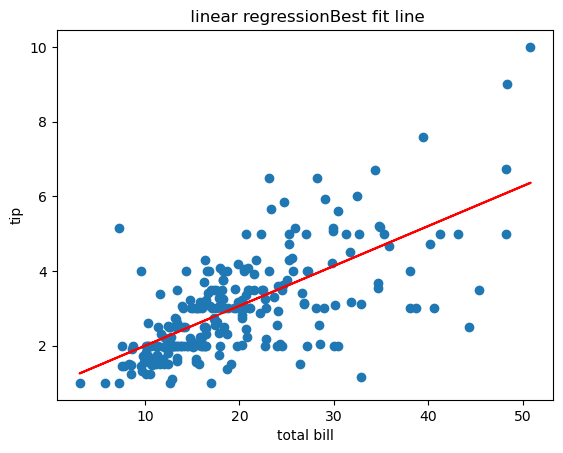

In [18]:
#10.visualize the best fit line
plt.scatter(X,y)
plt.plot(X,model.predict(scaler.transform(X)),color='red')
plt.xlabel('total bill')
plt.ylabel('tip')
plt.title(' linear regressionBest fit line')
plt.show()



In [21]:
#11.Input-Output real time
bill_amount=float(input("enter the total bill amount:"))
bill_scaled=scaler.transform([[bill_amount]])
predict_tip=model.predict(bill_scaled)
print(f"predicted tip amounnt :{predict_tip[0]:.2f}")

predicted tip amounnt :27.67


c:\Users\jahna\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
